In [239]:
import pandas as pd
import seaborn as sns
import plotly.express as px


In [240]:
start = 50

dataframes = []
def lr_batch_dropout(path):
    temp = path.split("_")
    lr = float(temp[1])
    batch_size = int(temp[3])
    dropout = float(temp[5][:-4])
    df = pd.read_csv(path)
    df = df[["train loss", "train acc", "val loss", "val acc"]]
    df["lr"] = lr
    df["batch size"] = batch_size
    df["dropout"] = dropout
    dataframes.append(df[df.index >= start])
    return lr, batch_size, dropout

In [241]:
# commented out ones overfit like crazy
# lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_0.0001_batch_256_dropout_0.1.csv")
# lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_0.0003_batch_256_dropout_0.1.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_256_dropout_0.1.csv")
# lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_0.0003_batch_256_dropout_0.5.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_0.0001_batch_256_dropout_0.5.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_128_dropout_0.1.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_128_dropout_0.5.csv")
# lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_0.0001_batch_128_dropout_0.5.csv")
# lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_512_dropout_0.5.csv") # This one converges way too slow
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_64_dropout_0.5.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_64_dropout_0.1.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_64_dropout_0.3.csv")
lr_batch_dropout("/Users/amberwang/Desktop/MIT/6.8611 [NLP]/lang-autoencoder/data/lr_3e-05_batch_32_dropout_0.3.csv")

(3e-05, 32, 0.3)

In [242]:
print(dataframes)

[     train loss  train acc  val loss   val acc       lr  batch size  dropout
50     2.213853   0.118644  2.663494  0.094298  0.00003         256      0.1
51     2.736930   0.107081  2.655375  0.095029  0.00003         256      0.1
52     2.773380   0.114726  2.646633  0.097953  0.00003         256      0.1
53     2.335121   0.118126  2.638555  0.099415  0.00003         256      0.1
54     2.332453   0.114458  2.630229  0.105263  0.00003         256      0.1
..          ...        ...       ...       ...      ...         ...      ...
245    1.388878   0.395793  2.122781  0.223684  0.00003         256      0.1
246    1.299437   0.396794  2.123681  0.225877  0.00003         256      0.1
247    1.559839   0.415410  2.123463  0.226608  0.00003         256      0.1
248    1.442418   0.398182  2.132329  0.225877  0.00003         256      0.1
249    1.420783   0.390741  2.123567  0.221491  0.00003         256      0.1

[200 rows x 7 columns],      train loss  train acc  val loss   val acc    

In [243]:
merged_df = pd.concat(dataframes, axis=0)
display(merged_df)

,train loss,train acc,val loss,val acc,lr,batch size,dropout
50,2.213853,0.118644,2.663494,0.094298,0.00003,256,0.1
51,2.736930,0.107081,2.655375,0.095029,0.00003,256,0.1
52,2.773380,0.114726,2.646633,0.097953,0.00003,256,0.1
53,2.335121,0.118126,2.638555,0.099415,0.00003,256,0.1
54,2.332453,0.114458,2.630229,0.105263,0.00003,256,0.1
...,...,...,...,...,...,...,...
245,0.764927,0.669118,2.326255,0.214181,0.00003,32,0.3
246,0.591543,0.650943,2.326201,0.214181,0.00003,32,0.3
247,0.693471,0.591304,2.318583,0.219298,0.00003,32,0.3
248,0.561878,0.650000,2.342884,0.218567,0.00003,32,0.3


In [244]:
def graph_col(col):
    col_df = merged_df[[col, "lr", "batch size", "dropout"]]
    col_data = (col_df.pivot(columns=["lr", "batch size", "dropout"]))
    df_flat = col_data.copy()
    df_flat.columns = ['_'.join(str(col_item) for col_item in col).strip() for col in col_data.columns.values]
    df_flat = df_flat.reset_index()

    display(df_flat)
    col_data.plot()

,index,train loss_3e-05_256_0.1,train loss_0.0001_256_0.5,train loss_3e-05_128_0.1,train loss_3e-05_128_0.5,train loss_3e-05_64_0.5,train loss_3e-05_64_0.1,train loss_3e-05_64_0.3,train loss_3e-05_32_0.3
0,50,2.213853,2.103011,2.250449,2.432929,2.568079,1.800952,2.198443,1.944858
1,51,2.736930,2.240860,2.112793,2.567349,2.420246,2.164799,2.090150,1.622624
2,52,2.773380,2.916877,2.459431,2.937943,2.440534,2.172816,2.193256,2.092475
3,53,2.335121,2.244723,2.052327,2.411768,2.749376,1.769303,2.003396,1.729605
4,54,2.332453,2.793324,2.172889,2.970342,2.576985,1.911922,2.895402,2.158500
...,...,...,...,...,...,...,...,...,...
195,245,1.388878,0.975491,0.873424,1.675691,1.445506,0.631031,1.064082,0.764927
196,246,1.299437,1.246547,1.166007,1.270676,1.346660,0.635232,0.932414,0.591543
197,247,1.559839,1.388121,0.934018,1.734696,1.433055,0.582752,0.927290,0.693471
198,248,1.442418,1.406271,1.301175,1.795296,1.329810,0.650509,1.060940,0.561878


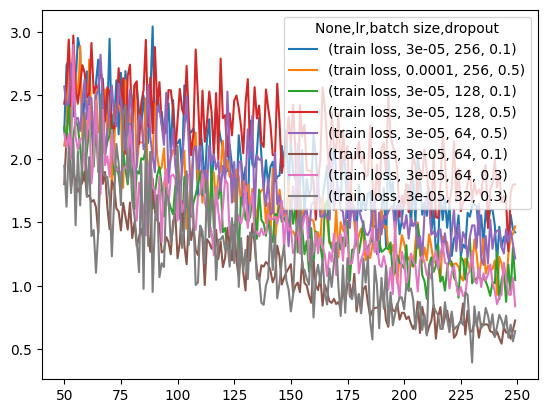

In [245]:
graph_col("train loss")

,index,val loss_3e-05_256_0.1,val loss_0.0001_256_0.5,val loss_3e-05_128_0.1,val loss_3e-05_128_0.5,val loss_3e-05_64_0.5,val loss_3e-05_64_0.1,val loss_3e-05_64_0.3,val loss_3e-05_32_0.3
0,50,2.663494,2.530808,2.433550,2.649020,2.540187,2.234886,2.390435,2.205874
1,51,2.655375,2.522396,2.426718,2.643805,2.537036,2.230790,2.378856,2.203270
2,52,2.646633,2.523790,2.418804,2.643325,2.534120,2.218333,2.375269,2.203693
3,53,2.638555,2.514482,2.409575,2.639008,2.534766,2.211322,2.372692,2.190958
4,54,2.630229,2.516144,2.402144,2.637886,2.534577,2.210363,2.379552,2.188631
...,...,...,...,...,...,...,...,...,...
195,245,2.122781,2.189544,2.149801,2.184866,2.175039,2.238286,2.180507,2.326255
196,246,2.123681,2.194057,2.136796,2.181989,2.167223,2.236769,2.174444,2.326201
197,247,2.123463,2.192948,2.146059,2.181595,2.173479,2.244535,2.181288,2.318583
198,248,2.132329,2.190124,2.141994,2.183537,2.181396,2.239614,2.175931,2.342884


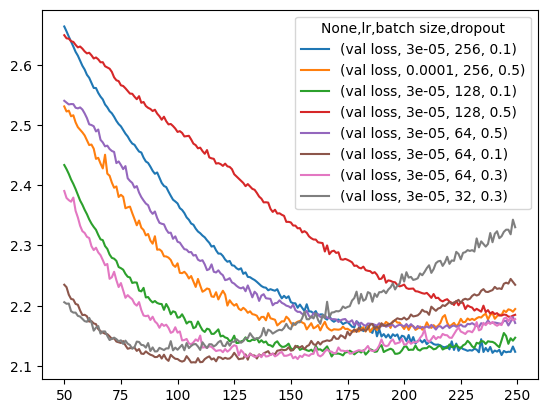

In [246]:
graph_col("val loss")

,index,train acc_3e-05_256_0.1,train acc_0.0001_256_0.5,train acc_3e-05_128_0.1,train acc_3e-05_128_0.5,train acc_3e-05_64_0.5,train acc_3e-05_64_0.1,train acc_3e-05_64_0.3,train acc_3e-05_32_0.3
0,50,0.118644,0.105590,0.179298,0.059172,0.079787,0.293561,0.148496,0.333333
1,51,0.107081,0.108481,0.170923,0.056391,0.100733,0.295345,0.181102,0.240000
2,52,0.114726,0.071429,0.190801,0.049587,0.088679,0.255217,0.166979,0.246154
3,53,0.118126,0.110454,0.181818,0.058233,0.088670,0.258964,0.199609,0.269565
4,54,0.114458,0.079618,0.188825,0.048860,0.095819,0.278947,0.167614,0.335526
...,...,...,...,...,...,...,...,...,...
195,245,0.395793,0.444444,0.570231,0.300184,0.380000,0.754717,0.505226,0.669118
196,246,0.396794,0.407470,0.550794,0.326340,0.369449,0.753846,0.526733,0.650943
197,247,0.415410,0.397152,0.539841,0.273063,0.357751,0.733962,0.516832,0.591304
198,248,0.398182,0.412577,0.542493,0.307033,0.360377,0.757877,0.546980,0.650000


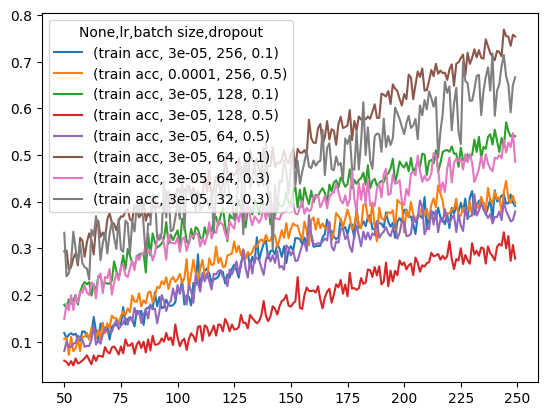

In [247]:
graph_col("train acc")

,index,val acc_3e-05_256_0.1,val acc_0.0001_256_0.5,val acc_3e-05_128_0.1,val acc_3e-05_128_0.5,val acc_3e-05_64_0.5,val acc_3e-05_64_0.1,val acc_3e-05_64_0.3,val acc_3e-05_32_0.3
0,50,0.094298,0.103070,0.141813,0.069444,0.087719,0.210526,0.141082,0.206871
1,51,0.095029,0.105263,0.144737,0.070175,0.089181,0.206140,0.147661,0.206140
2,52,0.097953,0.102339,0.146199,0.069444,0.090643,0.211988,0.153509,0.209064
3,53,0.099415,0.104532,0.151316,0.070175,0.090643,0.212719,0.151316,0.206140
4,54,0.105263,0.105263,0.154971,0.070175,0.089912,0.214912,0.148392,0.209795
...,...,...,...,...,...,...,...,...,...
195,245,0.223684,0.203216,0.220760,0.209064,0.207602,0.220029,0.220760,0.214181
196,246,0.225877,0.207602,0.225146,0.211257,0.211988,0.220760,0.225146,0.214181
197,247,0.226608,0.208333,0.222953,0.211988,0.210526,0.220760,0.222953,0.219298
198,248,0.225877,0.211988,0.224415,0.211257,0.206140,0.217836,0.225146,0.218567


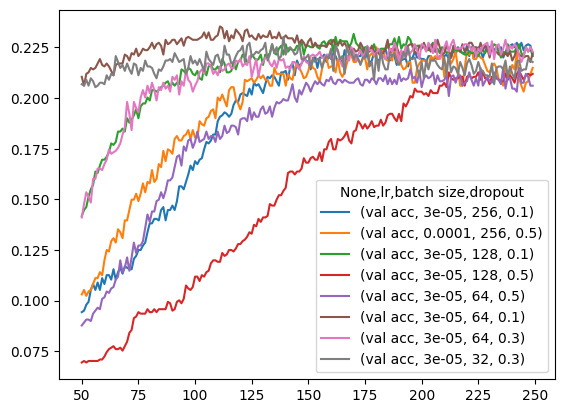

In [248]:
graph_col("val acc")